Multinomial logistic regression


import library

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#for chapter 3.2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Importing the Given Dataset
data=pd.read_csv("/content/drive/MyDrive/data3.csv")
data.head()

,Year,Month,PN,Rainfall,IOD
0,1950,JAN,0,35.6,-0.21
1,1950,FEB,0,26.0,-0.32
2,1950,MAR,0,36.9,-0.36
3,1950,APR,0,28.9,-0.28
4,1950,MAY,0,49.3,-0.27


In [4]:
data.tail()

,Year,Month,PN,Rainfall,IOD
787,2015,AUG,2,205.2,0.54
788,2015,SEP,2,131.8,0.82
789,2015,OCT,2,42.9,0.75
790,2015,NOV,2,39.4,0.40
791,2015,DEC,0,15.0,-0.07


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y=data["PN"]
x=data[['Rainfall','IOD']]

In [7]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=0)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(633, 2)
(633,)
(159, 2)
(159,)


In [9]:
#!pip install imblearn

In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train, y_train)

In [11]:
print(sum(y_train==0),sum(y_train_os==0))

496 496


In [12]:
print(sum(y_train==1),sum(y_train_os==1))

66 496


In [13]:
print(sum(y_train==2),sum(y_train_os==2))

71 496


In [14]:
from sklearn.linear_model import LogisticRegression
l_model=LogisticRegression(solver='newton-cg',multi_class='multinomial')
#building the model
l_model.fit(x_train_os, y_train_os)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [15]:
y_pred=l_model.predict(x_test)
y_pred

array([1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1,
       0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 2,
       1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2,
       2, 2, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0,
       0, 1, 1, 2, 0])

In [16]:
print("Intercept:", l_model.intercept_)
print("Coefficient:", l_model.coef_)

Intercept: [ 0.66815934 -0.21042678 -0.45773256]
Coefficient: [[ 2.49130134e-04 -5.93632129e-01]
 [ 9.57066654e-04 -5.05457356e+00]
 [-1.20619679e-03  5.64820569e+00]]


 Model validation
Let’s print the accuracy and error rate:

In [17]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y_test, y_pred)))

Accuracy: 0.62
Error rate: 0.38


Let’s have a look at the scores from cross validation:

In [18]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores

array([0.84251969, 0.79527559, 0.79527559, 0.84126984, 0.83333333])

In [19]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.04)


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[70 34 23]
 [ 1 10  0]
 [ 3  0 18]]


plot the confusion matrix:

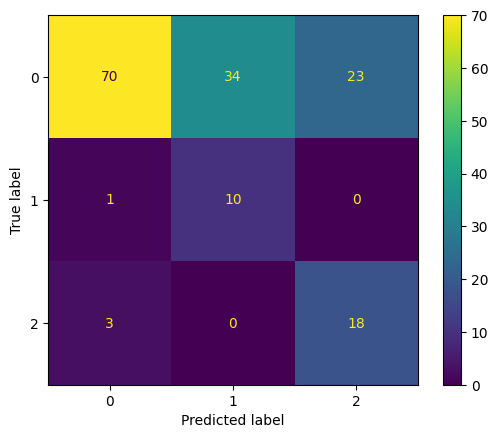

In [21]:
cmd = ConfusionMatrixDisplay(confusion_matrix)
cmd.plot()

We also have the opportunity to get the probabilities of the predicted classes:

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70       127
           1       0.23      0.91      0.36        11
           2       0.44      0.86      0.58        21

    accuracy                           0.62       159
   macro avg       0.54      0.77      0.55       159
weighted avg       0.83      0.62      0.66       159



In [23]:
probability = l_model.predict_proba(x_test)
probability

array([[4.44232391e-01, 5.22510407e-01, 3.32572028e-02],
       [2.24093972e-02, 2.78388749e-04, 9.77312214e-01],
       [5.65020748e-01, 1.85419083e-01, 2.49560170e-01],
       [3.16140364e-01, 6.74534565e-01, 9.32507073e-03],
       [5.06155748e-01, 1.03793039e-01, 3.90051213e-01],
       [5.69723816e-01, 1.96601874e-01, 2.33674311e-01],
       [5.28141623e-01, 1.32616845e-01, 3.39241532e-01],
       [4.70876673e-01, 9.06065075e-02, 4.38516819e-01],
       [3.50011319e-01, 6.37265697e-01, 1.27229837e-02],
       [5.04294342e-01, 4.46703852e-01, 4.90018059e-02],
       [2.78467206e-01, 7.15410787e-01, 6.12200678e-03],
       [5.75908439e-01, 2.53874143e-01, 1.70217418e-01],
       [5.67484507e-01, 1.93199028e-01, 2.39316465e-01],
       [5.37502358e-01, 1.41936033e-01, 3.20561609e-01],
       [4.49671155e-01, 5.15922023e-01, 3.44068216e-02],
       [5.45217349e-01, 1.50936110e-01, 3.03846540e-01],
       [1.46505617e-01, 8.52447774e-01, 1.04660922e-03],
       [4.64450615e-02, 9.07085

Each column here represents a class. The class with the highest probability is the output of the predicted class. Here we can see that the length of the probability data is the same as the length of the test data.

```
# This is formatted as code
```



In [24]:
print(probability.shape[0])
print(x_test.shape[0])

159
159


more presenatable

In [25]:
df = pd.DataFrame(l_model.predict_proba(x_test), columns=l_model.classes_)
df.head()


,0,1,2
0,0.444232,0.522510,0.033257
1,0.022409,0.000278,0.977312
2,0.565021,0.185419,0.249560
3,0.316140,0.674535,0.009325
4,0.506156,0.103793,0.390051


The sum of the probabilities must always be 1. We can see here

In [26]:
df['sum'] = df.sum(axis=1)
df.head()

,0,1,2,sum
0,0.444232,0.522510,0.033257,1.0
1,0.022409,0.000278,0.977312,1.0
2,0.565021,0.185419,0.249560,1.0
3,0.316140,0.674535,0.009325,1.0
4,0.506156,0.103793,0.390051,1.0


lets add the predicted classes…

In [27]:
df['predicted_class'] = y_pred
df.head()

,0,1,2,sum,predicted_class
0,0.444232,0.522510,0.033257,1.0,1
1,0.022409,0.000278,0.977312,1.0,2
2,0.565021,0.185419,0.249560,1.0,0
3,0.316140,0.674535,0.009325,1.0,1
4,0.506156,0.103793,0.390051,1.0,0


In [28]:
#and the actual classes:

df['actual_class'] = y_test.to_frame().reset_index().drop(columns='index')
df.head()

,0,1,2,sum,predicted_class,actual_class
0,0.444232,0.522510,0.033257,1.0,1,0
1,0.022409,0.000278,0.977312,1.0,2,2
2,0.565021,0.185419,0.249560,1.0,0,0
3,0.316140,0.674535,0.009325,1.0,1,0
4,0.506156,0.103793,0.390051,1.0,0,0


In [29]:
le = preprocessing.LabelEncoder()

df['label_pred'] = le.fit_transform(df['predicted_class'])
df['label_actual'] = le.fit_transform(df['actual_class'])
df.head()

,0,1,2,sum,predicted_class,actual_class,label_pred,label_actual
0,0.444232,0.522510,0.033257,1.0,1,0,1,0
1,0.022409,0.000278,0.977312,1.0,2,2,2,2
2,0.565021,0.185419,0.249560,1.0,0,0,0,0
3,0.316140,0.674535,0.009325,1.0,1,0,1,0
4,0.506156,0.103793,0.390051,1.0,0,0,0,0


In [30]:
targets = df['predicted_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{1: 1, 2: 2, 0: 0}

In [31]:
targets = df['actual_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{0: 0, 2: 2, 1: 1}

In [32]:
df['check'] = df['label_actual'] - df['label_pred']
df.head(7)

,0,1,2,sum,predicted_class,actual_class,label_pred,label_actual,check
0,0.444232,0.522510,0.033257,1.0,1,0,1,0,-1
1,0.022409,0.000278,0.977312,1.0,2,2,2,2,0
2,0.565021,0.185419,0.249560,1.0,0,0,0,0,0
3,0.316140,0.674535,0.009325,1.0,1,0,1,0,-1
4,0.506156,0.103793,0.390051,1.0,0,0,0,0,0
5,0.569724,0.196602,0.233674,1.0,0,0,0,0,0
6,0.528142,0.132617,0.339242,1.0,0,0,0,0,0


In [33]:
df['correct_prediction?'] = np.where(df['check'] == 0, 'True', 'False')
df = df.drop(['label_pred', 'label_actual', 'check'], axis=1)
df.head()

,0,1,2,sum,predicted_class,actual_class,correct_prediction?
0,0.444232,0.522510,0.033257,1.0,1,0,False
1,0.022409,0.000278,0.977312,1.0,2,2,True
2,0.565021,0.185419,0.249560,1.0,0,0,True
3,0.316140,0.674535,0.009325,1.0,1,0,False
4,0.506156,0.103793,0.390051,1.0,0,0,True


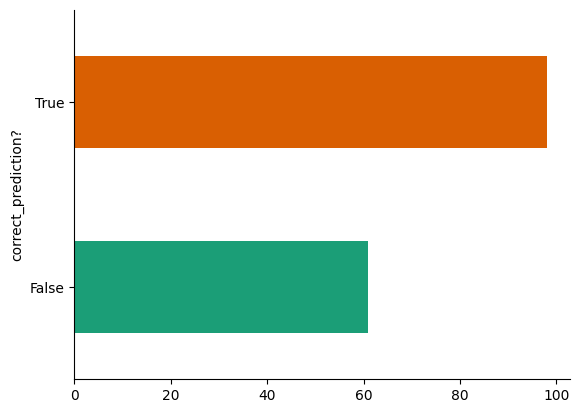

In [34]:
# @title correct_prediction? (not necessary)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('correct_prediction?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Now we can use the generated “values” to manually calculate the accuracy again.

In [35]:
true_predictions = df[(df["correct_prediction?"] == 'True')].shape[0]
false_predictions = df[(df["correct_prediction?"] == 'False')].shape[0]
total = df["correct_prediction?"].shape[0]

print('manual calculated Accuracy is:', (true_predictions / total * 100))

manual calculated Accuracy is: 61.63522012578616


In [36]:
wrong_pred = df[(df["correct_prediction?"] == 'False')]
wrong_pred

,0,1,2,sum,predicted_class,actual_class,correct_prediction?
0,0.444232,0.522510,0.033257,1.0,1,0,False
3,0.316140,0.674535,0.009325,1.0,1,0,False
8,0.350011,0.637266,0.012723,1.0,1,0,False
10,0.278467,0.715411,0.006122,1.0,1,0,False
11,0.575908,0.253874,0.170217,1.0,0,2,False
...,...,...,...,...,...,...,...
149,0.422165,0.550751,0.027084,1.0,1,0,False
151,0.265693,0.728211,0.006096,1.0,1,0,False
152,0.402522,0.059657,0.537822,1.0,2,0,False
155,0.209784,0.787208,0.003008,1.0,1,0,False
